<a href="https://colab.research.google.com/github/ankitrao260100-blip/exploratory_data_analysis_eda_on_a_public_dataset.ipynb/blob/main/HexSoftwares_Analyzing_and_Visualizing_Movie_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("IMDB-Movie-Data.csv")   # Make sure to upload 'movies.csv' to your Colab files or provide the correct path.
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [9]:
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
df = df.dropna(subset=['Rating'])

# Convert rating to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Remove invalid ratings
df = df[(df['Rating'] >= 0) & (df['Rating'] <= 10)]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [13]:
mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()
mode_rating = df['Rating'].mode()[0]

print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)

Mean Rating: 6.723199999999999
Median Rating: 6.8
Mode Rating: 7.1


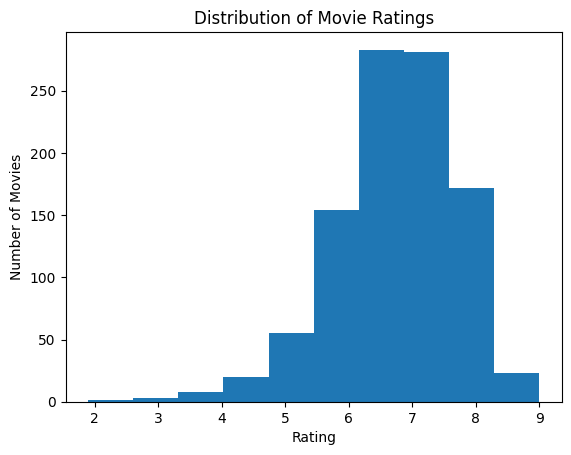

In [17]:
plt.figure()
plt.hist(df['Rating'], bins=10)
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Ratings")
plt.show()

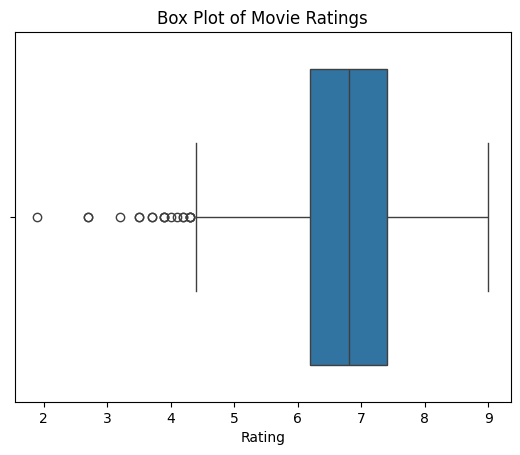

In [20]:
plt.figure()
sns.boxplot(x=df['Rating'])
plt.title("Box Plot of Movie Ratings")
plt.show()

In [22]:
top_movies = df.sort_values(by='Rating', ascending=False).head(10)
top_movies[['Title', 'Rating']]

,Title,Rating
54,The Dark Knight,9.0
80,Inception,8.8
117,Dangal,8.8
36,Interstellar,8.6
249,The Intouchables,8.6
96,Kimi no na wa,8.6
64,The Prestige,8.5
99,The Departed,8.5
476,The Lives of Others,8.5
124,The Dark Knight Rises,8.5


In [23]:
top_genres = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
top_genres

,Rating
Genre,
"Animation,Drama,Fantasy",8.60
"Drama,Family,Music",8.50
"Drama,Western",8.40
"Animation,Drama,Romance",8.40
"Adventure,Drama,Sci-Fi",8.30
...,...
"Action,Fantasy,Thriller",5.20
"Sci-Fi,Thriller",5.00
Sci-Fi,4.95


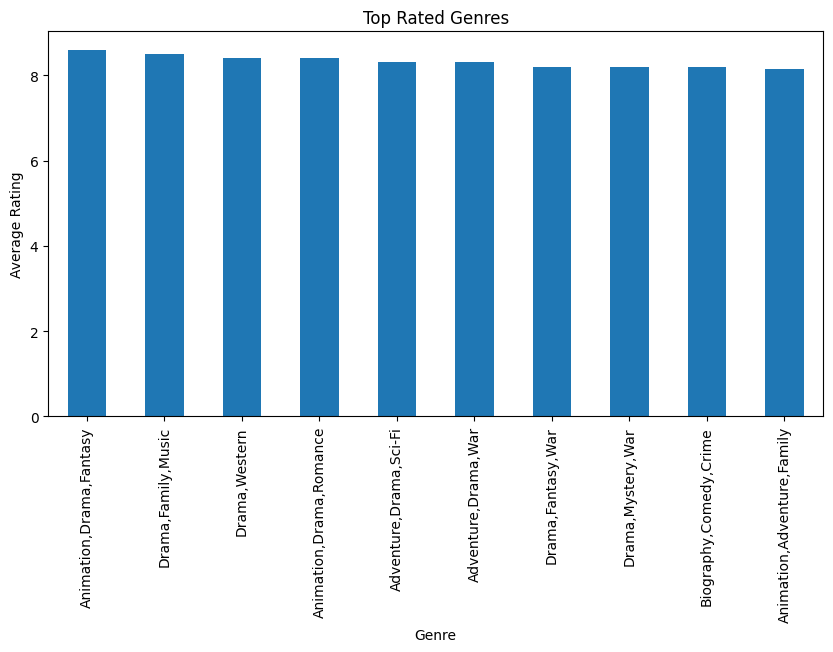

In [25]:
plt.figure(figsize=(10,5))
top_genres.head(10).plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Top Rated Genres")
plt.show()

🎬 # Movie Ratings Dashboard

### Summary Statistics
Mean Rating: 6.723199999999999
Median Rating: 6.8
Mode Rating: 7.1

### Ratings Distribution


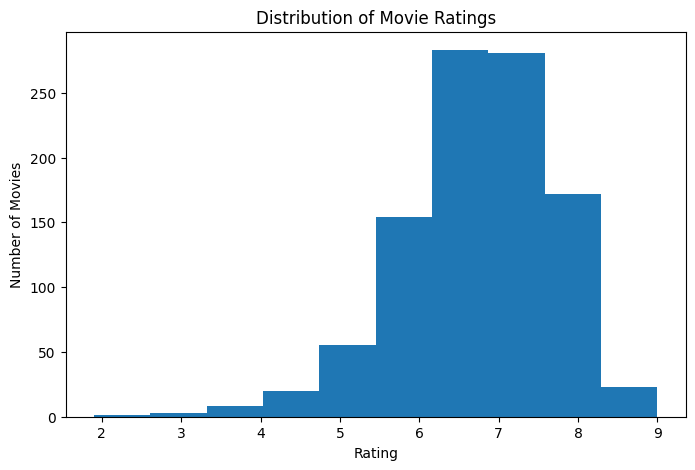


### Top 10 Movies


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0
476,477,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0



### Top Genres


,Rating
Genre,
"Animation,Drama,Fantasy",8.60
"Drama,Family,Music",8.50
"Drama,Western",8.40
"Animation,Drama,Romance",8.40
"Adventure,Drama,Sci-Fi",8.30
...,...
"Action,Fantasy,Thriller",5.20
"Sci-Fi,Thriller",5.00
Sci-Fi,4.95


In [28]:
# The 'streamlit' module is not installed, and its display functions are not designed for direct output in a Colab cell.
# To display similar information directly within the Colab notebook, we will use standard Python print statements,
# matplotlib for plots, and direct pandas DataFrame display.

# The 'df' DataFrame is already loaded and processed in previous cells, so we will use the existing 'df'.

print("🎬 # Movie Ratings Dashboard") # Mimic title

print("\n### Summary Statistics") # Mimic subheader
print("Mean Rating:", df['Rating'].mean())
print("Median Rating:", df['Rating'].median())
print("Mode Rating:", df['Rating'].mode()[0])

print("\n### Ratings Distribution") # Mimic subheader
fig, ax = plt.subplots(figsize=(8, 5)) # Add figsize for better plot size
ax.hist(df['Rating'], bins=10) # Corrected column name to 'Rating'
ax.set_xlabel("Rating") # Use ax.set_xlabel for consistency with ax.hist
ax.set_ylabel("Number of Movies")
ax.set_title("Distribution of Movie Ratings")
plt.show(fig) # Use plt.show() to display the plot in Colab

print("\n### Top 10 Movies") # Mimic subheader
display(df.sort_values(by='Rating', ascending=False).head(10)) # Corrected column name to 'Rating' and use display() for DataFrames

print("\n### Top Genres") # Mimic subheader
# Group by 'Genre' (capital G) and sort by 'Rating' (capital R)
display(df.groupby('Genre')['Rating'].mean().sort_values(ascending=False))